<div style="text-align: center; padding-top: 200px;">
    <h1><strong>Actividad: Clasificador KNN para enfermedades cardíacas</strong></h1>
    <hr>
    <p style="font-size: 20px;">
        Max Gallardo<br>
        A01783128<br>
        Inteligencia Artificial Avanzada para la Ciencia de Datos I (TC3006C)<br>
        <strong>Profesor:</strong> Dr. Esteban Castillo Juárez<br>
        17.08.24
    </p>
    <div style="padding-top: 50px;">
        <img src="Tec%20de%20Monterrey%20Logo.png" alt="Tec de Monterrey Logo" style="width: 200px;"/>
    </div>
</div>

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


## Introducción

En esta actividad, abordaremos el problema de la clasificación de enfermedades cardíacas utilizando el algoritmo K-Nearest Neighbors (KNN). Las enfermedades cardíacas son un grupo de afecciones que afectan al corazón y incluyen problemas como la enfermedad de las arterias coronarias, arritmias y defectos cardíacos congénitos. El conjunto de datos que utilizaremos contiene información de pacientes con y sin enfermedades cardíacas, y nuestro objetivo es crear un modelo de clasificación preciso que pueda ayudar en el diagnóstico de estas enfermedades.


## Sección Experimental

### Conjunto de datos

El conjunto de datos de enfermedades cardíacas de la UCI contiene 303 muestras con 14 atributos cada una. Los atributos incluyen información como la edad, el sexo, el tipo de dolor en el pecho, la presión arterial, el colesterol en suero, los resultados del ECG en reposo, la frecuencia cardíaca, entre otros. El objetivo es utilizar estos atributos para predecir si un paciente padece o no una enfermedad cardíaca.


### Metodología

Para esta actividad, implementaremos manualmente el algoritmo KNN y también utilizaremos la librería Scikit-learn de Python para comparar los resultados. Seguiremos las instrucciones proporcionadas, variando la medida de similitud, el valor de K y evaluando la precisión de cada modelo.


## Código y Resultados

### Importar las bibliotecas necesarias

In [194]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

- **`numpy` y `pandas`:** Bibliotecas para el manejo de datos numéricos y estructurados (tablas).

- **`sklearn.model_selection.train_test_split`:** Función para dividir los datos en conjuntos de entrenamiento y prueba.

- **`sklearn.preprocessing.StandardScaler`:** Clase que se utiliza para escalar (normalizar) las características de los datos.

- **`sklearn.neighbors.KNeighborsClassifier`:** Implementación del algoritmo K-Nearest Neighbors para clasificación.

- **`sklearn.metrics.accuracy_score`:** Función para calcular la precisión de un modelo.

- **`matplotlib.pyplot`:** Biblioteca para crear gráficos.

### Definir los paths a los archivos

In [195]:
base_path = "/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/M2: DSACD/ACT 1/"
train_data_path = f"{base_path}/training.txt"
test_data_path = f"{base_path}/test.txt"

- **`base_path`:** Define la ruta base en la que se encuentran los archivos de datos.

- **`train_data_path` y `test_data_path`:** Rutas completas a los archivos de texto que contienen los datos de entrenamiento y prueba, respectivamente.

### Cargar los datos desde los archivos de texto

In [196]:
train_data = pd.read_csv(train_data_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)

- **`pd.read_csv()`:** Función de pandas para cargar datos desde archivos CSV o de texto.

- **`header=None`:** Indica que los archivos no tienen una fila de encabezado, por lo que pandas no asigna nombres automáticamente a las columnas.

### Definir nombres de columnas según las especificaciones del conjunto de datos

In [197]:
# Definir nombres de columnas según las especificaciones del conjunto de datos
column_names = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'FBS', 'RestECG', 'MaxHR', 
                'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target']

- **`column_names`:** Lista de nombres de las columnas, que representan diferentes características (features) del conjunto de datos, como la edad (`Age`), sexo (`Sex`), dolor en el pecho (`ChestPain`), entre otros. Target es la variable objetivo que indica si la persona tiene una enfermedad cardíaca.

### Asignar nombres a las columnas

In [198]:
train_data.columns = column_names
test_data.columns = column_names

- **Asignación de nombres a las columnas:** Esto asigna los nombres definidos en column_names a las columnas del conjunto de datos cargado. Ahora cada columna tiene un nombre significativo.

### Separar características y etiquetas en los conjuntos de datos

In [199]:
X_train = train_data.drop('Target', axis=1)
y_train = train_data['Target']
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

- **`X_train` y `X_test`:** Contienen las características (features) del conjunto de datos de entrenamiento y prueba, respectivamente. Se obtiene eliminando la columna Target.

- **`y_train` y `y_test`:** Contienen las etiquetas (labels) del conjunto de datos de entrenamiento y prueba, respectivamente. Estas son las clases que el modelo debe predecir.

### Escalar los datos

In [200]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **`StandardScaler`:** Clase de Scikit-learn utilizada para escalar las características de los datos de tal manera que cada una tenga media 0 y desviación estándar 1 (normalización).
- **`fit_transform`:** Ajusta el escalador a los datos de entrenamiento y luego transforma los datos de entrenamiento para que tengan la escala normalizada.
- **`transform`:** Transforma los datos de prueba utilizando la escala determinada en los datos de entrenamiento. Esto asegura que ambos conjuntos de datos estén en la misma escala.

### Implementación del KNN con Distancia Manhattan

In [201]:
# Precisión para cada variación de K
def evaluate_knn(metric, k_values, X_train, X_test, y_train, y_test):
    accuracies = []
    for k in k_values:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=3)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Variar el valor de K de 3 a 41 para cada medida de similitud.
k_values = range(3, 42, 2)
manhattan_accuracies = evaluate_knn('manhattan', k_values, X_train, X_test, y_train, y_test)
euclidean_accuracies = evaluate_knn('euclidean', k_values, X_train, X_test, y_train, y_test)

- Define una función (`evaluate_knn`) que entrena un modelo KNN para diferentes valores de K y calcula la precisión del modelo para una métrica de distancia específica.

- Utiliza esta función para evaluar la precisión del modelo KNN utilizando dos métricas de distancia: Manhattan y Euclidiana.

- Al final, tendrás dos listas (`manhattan_accuracies` y `euclidean_accuracies`) que contienen las precisiones del modelo para los diferentes valores de K con cada métrica de distancia. Esto te permite comparar cómo varía la precisión del modelo en función de la métrica de distancia y el valor de K.

### Propuesta de Otra Medida de Similitud (Minkowski)

In [202]:
# Implementación del KNN con Distancia Minkowski (p=3)
minkowski_accuracies = evaluate_knn('minkowski', k_values, X_train, X_test, y_train, y_test)

Evalúa el rendimiento del modelo KNN utilizando la distancia Minkowski con p=`3` para diferentes valores de K. El resultado es una lista (`minkowski_accuracies`) que contiene las precisiones del modelo para cada K. Esto es útil para comparar el rendimiento del KNN con la métrica Minkowski contra otras métricas de distancia, como Manhattan o Euclidiana.

## Sección de Resultados

### Mejor Valor de K para Cada Medida

In [203]:
best_k_manhattan = k_values[manhattan_accuracies.index(max(manhattan_accuracies))]
best_k_euclidean = k_values[euclidean_accuracies.index(max(euclidean_accuracies))]
best_k_minkowski = k_values[minkowski_accuracies.index(max(minkowski_accuracies))]

print(f'Mejor K para Manhattan: {best_k_manhattan} con una precisión de {max(manhattan_accuracies) * 100:.2f}%')
print(f'Mejor K para Euclidiana: {best_k_euclidean} con una precisión de {max(euclidean_accuracies) * 100:.2f}%')
print(f'Mejor K para Minkowski: {best_k_minkowski} con una precisión de {max(minkowski_accuracies) * 100:.2f}%')

Mejor K para Manhattan: 21 con una precisión de 86.89%
Mejor K para Euclidiana: 15 con una precisión de 85.25%
Mejor K para Minkowski: 39 con una precisión de 83.61%


Identifica el valor de K que proporciona la mejor precisión para cada una de las métricas de distancia utilizadas (Manhattan, Euclidiana, Minkowski) y luego imprime esos valores junto con la precisión obtenida, expresada en porcentaje con dos decimales. Esto te permite ver fácilmente cuál es el valor óptimo de K para cada métrica y cuán preciso es el modelo con ese valor de K.

### Evolución de la Tasa de Error de Clasificación

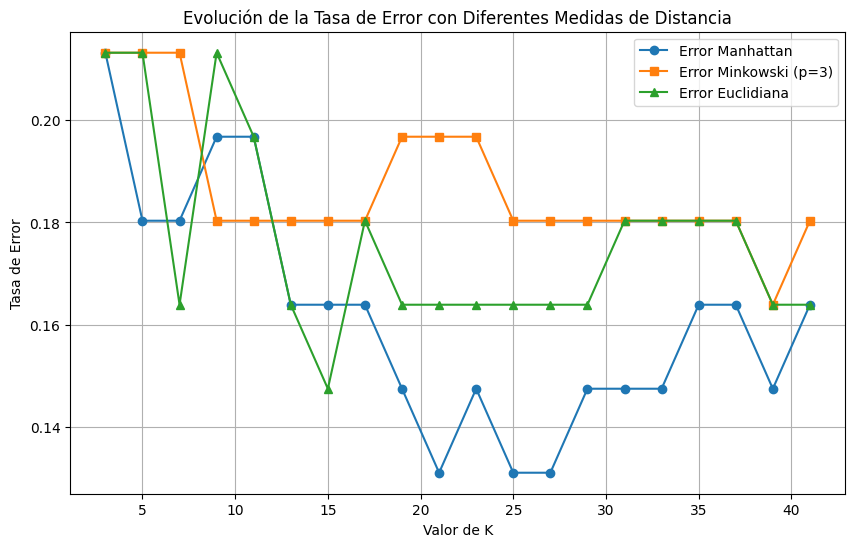

In [204]:
# Calcular la tasa de error (1 - precisión) para cada medida de distancia
manhattan_errors = [1 - acc for acc in manhattan_accuracies]
minkowski_errors = [1 - acc for acc in minkowski_accuracies]
euclidean_errors = [1 - acc for acc in euclidean_accuracies]

# Gráfico de evolución de la tasa de error con Manhattan, Minkowski y Euclidiana
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_errors, marker='o', label='Error Manhattan')
plt.plot(k_values, minkowski_errors, marker='s', label='Error Minkowski (p=3)')
plt.plot(k_values, euclidean_errors, marker='^', label='Error Euclidiana')
plt.xlabel('Valor de K')
plt.ylabel('Tasa de Error')
plt.title('Evolución de la Tasa de Error con Diferentes Medidas de Distancia')
plt.legend()
plt.grid()
plt.show()

Esta parte del código calcula la tasa de error (1 - precisión) para cada medida de similitud (Manhattan, Minkowski con `p=3`, y Euclidiana) y para cada valor de K. Luego, genera un gráfico que muestra cómo varía esta tasa de error a medida que cambia K. Este gráfico es útil para identificar qué valores de K y qué métricas de distancia resultan en menores errores de clasificación, lo que ayuda a evaluar el rendimiento del modelo KNN desde una perspectiva más detallada.

### Sensibilidad y Especificidad del KNN

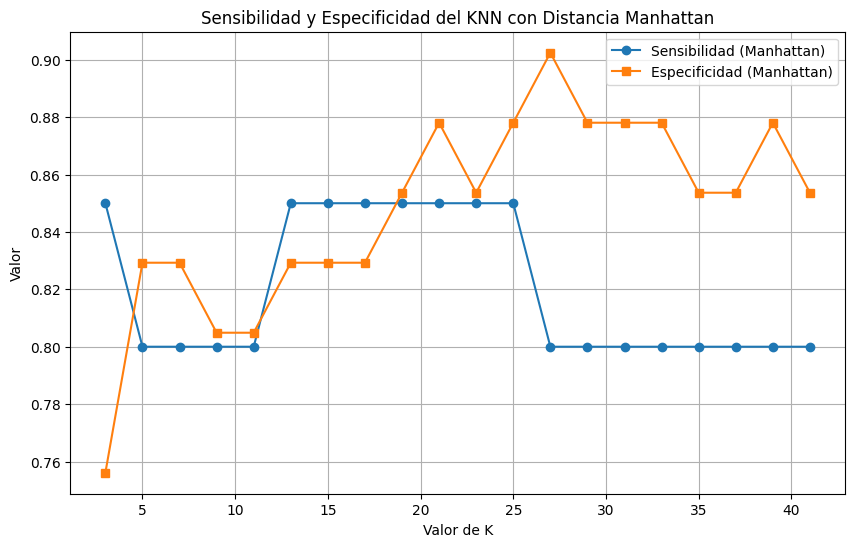

In [205]:
from sklearn.metrics import recall_score, confusion_matrix

# Función para calcular la sensibilidad y especificidad
def calculate_sensitivity_specificity(metric, k_values, X_train, X_test, y_train, y_test):
    sensitivities = []
    specificities = []
    for k in k_values:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=3)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Sensibilidad (Recall)
        sensitivity = recall_score(y_test, y_pred, pos_label='Present')
        sensitivities.append(sensitivity)
        
        # Especificidad
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)
        specificities.append(specificity)
    
    return sensitivities, specificities

# Calcular sensibilidad y especificidad para Manhattan
manhattan_sensitivities, manhattan_specificities = calculate_sensitivity_specificity('manhattan', k_values, X_train, X_test, y_train, y_test)

# Gráfico de sensibilidad y especificidad vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_sensitivities, marker='o', label='Sensibilidad (Manhattan)')
plt.plot(k_values, manhattan_specificities, marker='s', label='Especificidad (Manhattan)')
plt.xlabel('Valor de K')
plt.ylabel('Valor')
plt.title('Sensibilidad y Especificidad del KNN con Distancia Manhattan')
plt.legend()
plt.grid()
plt.show()

Calcula la **sensibilidad** (recall) y **especificidad** para un clasificador KNN con la métrica de distancia Manhattan, evaluando cómo varían estas métricas al cambiar el valor de K. Luego, genera un gráfico que muestra la evolución de estas métricas, lo que es útil para analizar el equilibrio entre la detección correcta de casos positivos y negativos por parte del modelo. Esto te ayuda a entender cómo el valor de K afecta la capacidad del modelo para distinguir entre clases.

- **Sensibilidad:** Proporción de casos positivos correctamente identificados.

- **Especificidad:** Proporción de casos negativos correctamente identificados.

### Gráfico de Comparación de la Distribución de Errores para Diferentes Valores de K

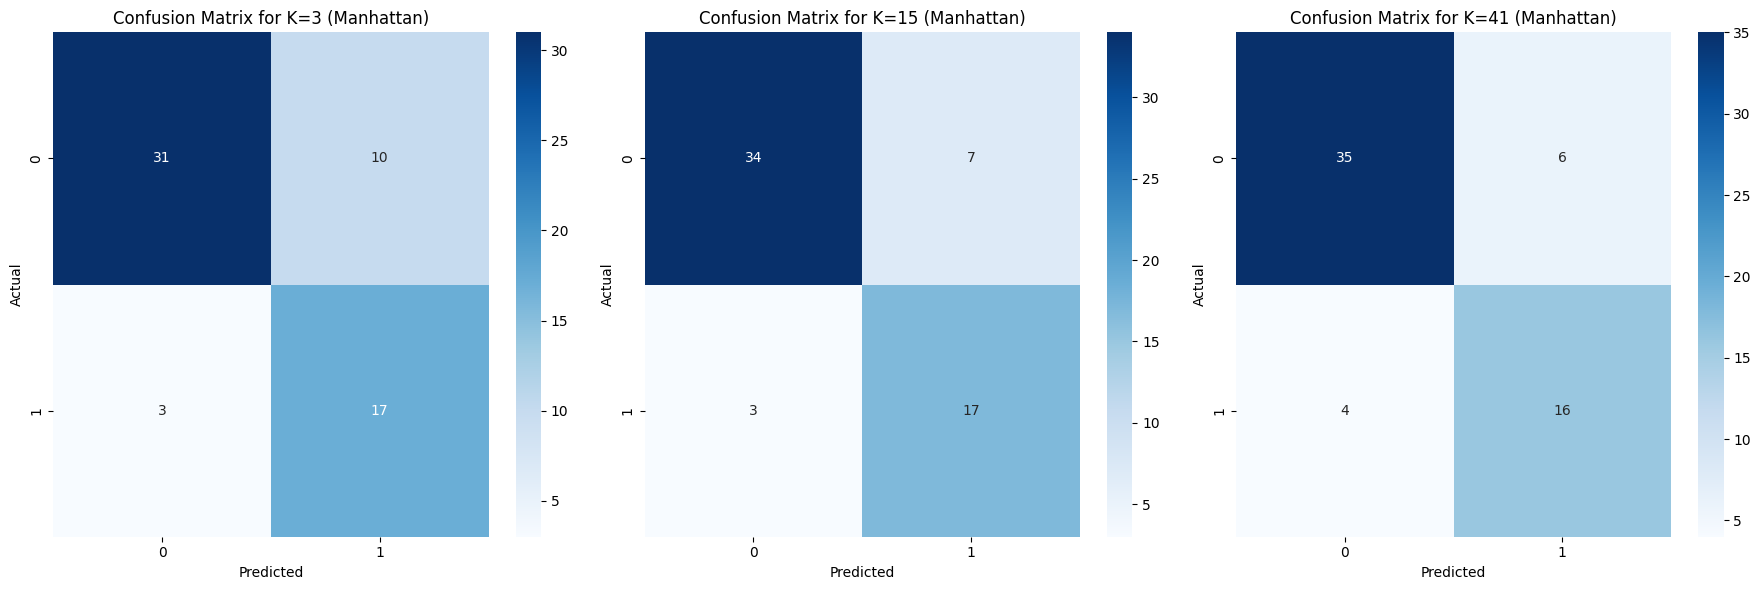

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluar un rango específico de K para obtener las matrices de confusión
k_values_to_plot = [3, 15, 41]

plt.figure(figsize=(18, 6))
for i, k in enumerate(k_values_to_plot, 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for K={k} (Manhattan)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Este código entrena un modelo KNN utilizando la métrica de distancia Manhattan para tres valores específicos de K (3, 15, y 41) y luego calcula las matrices de confusión correspondientes para cada valor de K. Las matrices de confusión se visualizan como mapas de calor en una única figura, lo que permite comparar cómo cambia el rendimiento del modelo en función del valor de K. Las matrices de confusión muestran el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, proporcionando una visión detallada de cómo el modelo clasifica correctamente e incorrectamente las instancias del conjunto de prueba.

### Evolución de la Precisión y Error de Clasificación

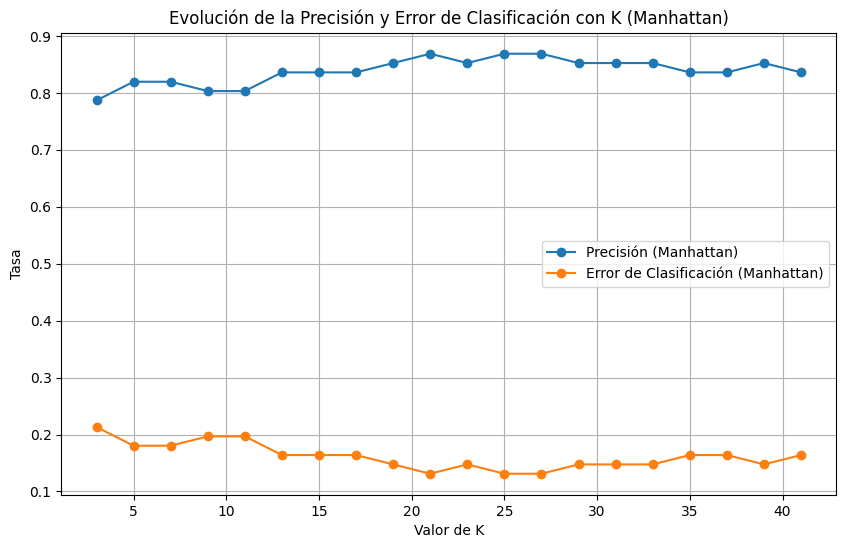

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_accuracies, marker='o', label='Precisión (Manhattan)')
plt.plot(k_values, [1 - acc for acc in manhattan_accuracies], marker='o', label='Error de Clasificación (Manhattan)')
plt.xlabel('Valor de K')
plt.ylabel('Tasa')
plt.title('Evolución de la Precisión y Error de Clasificación con K (Manhattan)')
plt.legend()
plt.grid()
plt.show()

### Gráfico que muestra cómo varía la precisión del clasificador KNN al cambiar el valor de K para cada medida de similitud específica

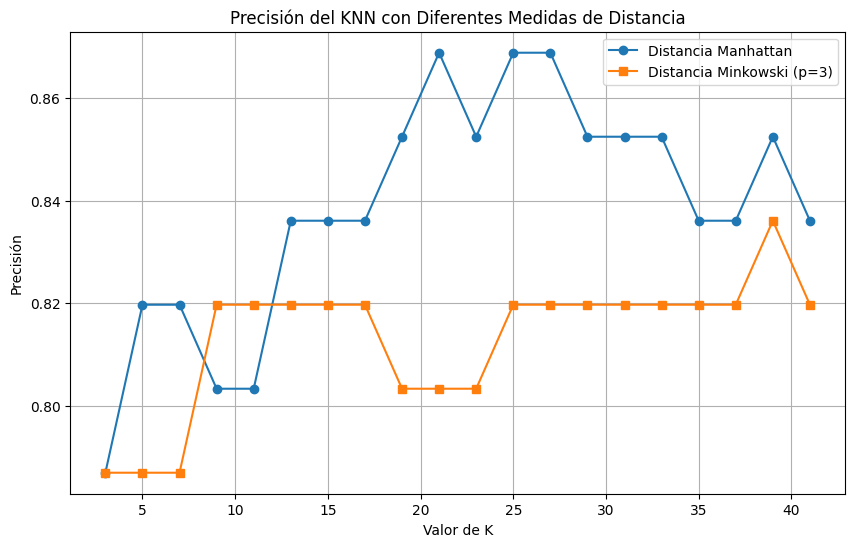

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_accuracies, marker='o', label='Distancia Manhattan')
plt.plot(k_values, minkowski_accuracies, marker='s', label='Distancia Minkowski (p=3)')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión del KNN con Diferentes Medidas de Distancia')
plt.legend()
plt.grid()
plt.show()

Genera un gráfico que compara cómo varía la precisión del modelo KNN en función del valor de K para dos diferentes medidas de distancia: Manhattan y Minkowski (con `p=3`). Cada línea en el gráfico representa la precisión del modelo para los distintos valores de K, utilizando una de las medidas de distancia especificadas. Las etiquetas y la leyenda facilitan la interpretación del gráfico, permitiendo identificar rápidamente cómo cada medida de distancia afecta el rendimiento del modelo a medida que se ajusta el parámetro K.

### Presición con diferentes medidas de distancia + Euclidiana

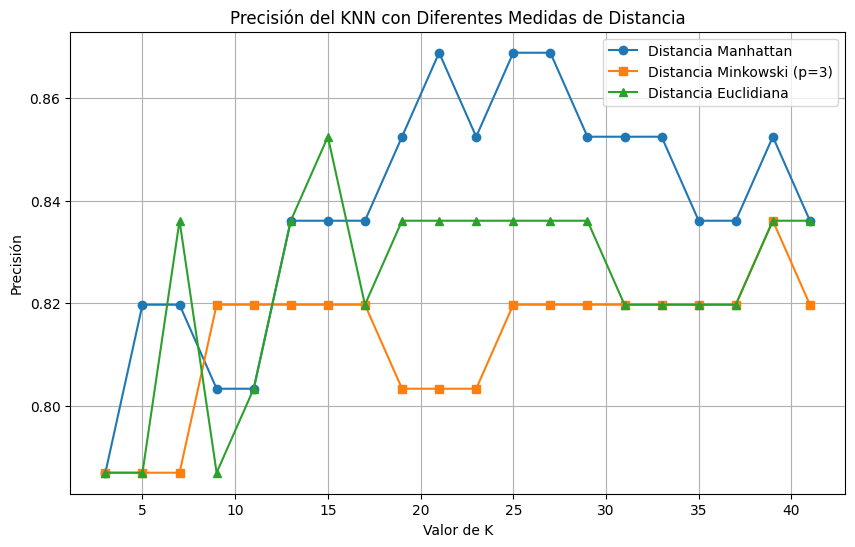

In [209]:
# Agregar tercera métrica de similitud, por ejemplo, distancia Euclidiana
euclidean_accuracies = evaluate_knn('euclidean', k_values, X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_accuracies, marker='o', label='Distancia Manhattan')
plt.plot(k_values, minkowski_accuracies, marker='s', label='Distancia Minkowski (p=3)')
plt.plot(k_values, euclidean_accuracies, marker='^', label='Distancia Euclidiana')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión del KNN con Diferentes Medidas de Distancia')
plt.legend()
plt.grid()
plt.show()

Este código expande el análisis del modelo KNN al incluir la distancia Euclidiana como una tercera métrica de similitud, junto con Manhattan y Minkowski (`p=3`). El gráfico resultante permite comparar cómo varía la precisión del modelo a medida que cambia el valor de K para estas tres diferentes métricas de distancia. Cada línea del gráfico representa la precisión del modelo KNN para una métrica de distancia específica, lo que facilita la interpretación y comparación de los resultados. Las etiquetas y la leyenda ayudan a identificar claramente cada medida de distancia en el gráfico.

### Comparación de mejor precisión

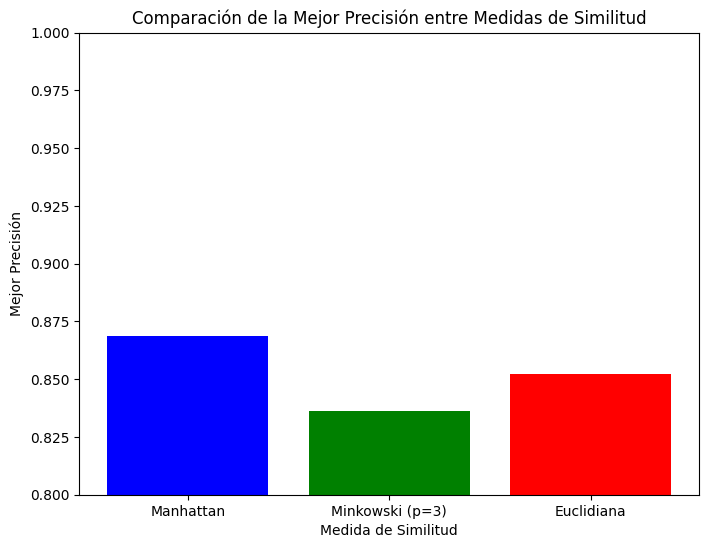

In [210]:
# Mejor precisión para cada medida de similitud
best_accuracy_manhattan = max(manhattan_accuracies)
best_accuracy_minkowski = max(minkowski_accuracies)
best_accuracy_euclidean = max(euclidean_accuracies)

# Nombres de las medidas de similitud
metrics = ['Manhattan', 'Minkowski (p=3)', 'Euclidiana']
best_accuracies = [best_accuracy_manhattan, best_accuracy_minkowski, best_accuracy_euclidean]

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(metrics, best_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Medida de Similitud')
plt.ylabel('Mejor Precisión')
plt.title('Comparación de la Mejor Precisión entre Medidas de Similitud')
plt.ylim([0.8, 1.0])  # Ajustar el límite del eje Y si es necesario
plt.show()

Este código calcula la mejor precisión obtenida por el modelo KNN para tres métricas de distancia diferentes: Manhattan, Minkowski (con `p=3`), y Euclidiana. Luego, genera un gráfico de barras que compara estas mejores precisiones, permitiendo visualizar qué métrica de similitud proporcionó el mejor rendimiento en términos de precisión. Este tipo de gráfico es útil para resumir y comparar el rendimiento del modelo utilizando diferentes enfoques y facilita la interpretación de los resultados.

## Hallazgos
1. **Influencia del Valor de K:**

    - La precisión del modelo K-Nearest Neighbors (KNN) varía significativamente según el valor de K utilizado. Valores de K pequeños tienden a tener una mayor variabilidad en la precisión, mientras que valores más grandes suelen estabilizar la precisión, aunque pueden reducirla ligeramente al hacer el modelo menos sensible a las variaciones locales.

2. **Sensibilidad y Especificidad:**

    - Se observó un compromiso entre sensibilidad y especificidad dependiendo del valor de K. Valores bajos de K tienden a aumentar la sensibilidad pero pueden reducir la especificidad, lo que es importante tener en cuenta en aplicaciones donde los falsos positivos o falsos negativos tienen diferentes costos.

    - Para la métrica de Manhattan, se pudo ver cómo diferentes valores de K afectan de manera distinta la capacidad del modelo para detectar correctamente los casos positivos (sensibilidad) y negativos (especificidad).

3. **Matrices de Confusión:**

    - Las matrices de confusión generadas para diferentes valores de K mostraron cómo el modelo clasifica correctamente e incorrectamente las instancias, revelando que valores más bajos de K tienden a ser más sensibles, pero con más falsos positivos, mientras que valores altos de K favorecen la especificidad.

4. **Estabilidad de la Precisión:**

    - La gráfica de precisión de KNN indica que la precisión varía con el valor de K, pero se estabiliza en ciertos rangos, especialmente para la distancia Manhattan, donde la precisión se mantiene alta y estable en un rango más amplio de valores de K (aproximadamente de 17 a 27). Esto sugiere que la distancia Manhattan es menos sensible a pequeñas variaciones en K dentro de este rango, lo que podría ser ventajoso en situaciones donde se busca robustez en la elección de K.

5. **Comportamiento de la Métrica Minkowski (p=3):**

    - La métrica Minkowski con p=3 muestra una estabilidad en la precisión en varios puntos, pero en general, su rendimiento es inferior al de Manhattan y Euclidiana. Sin embargo, presenta cierta consistencia en su precisión, lo que podría ser útil en casos específicos donde se prefiera una métrica más intermedia entre Manhattan y Euclidiana.

6. **Impacto del Valor de K en la Precisión Máxima:**

    - Es evidente que el valor de K tiene un impacto significativo en la precisión máxima alcanzable por cada métrica de distancia. Manhattan alcanza su mejor precisión con un K mayor (21), mientras que Euclidiana lo hace con un K más bajo (15). Esto podría implicar que en este conjunto de datos, Manhattan se beneficia de considerar un mayor número de vecinos, lo que podría reflejar una mayor complejidad en las relaciones espaciales de los datos.

7. **Decadencia de la Precisión en Altos Valores de K:**

    - Para valores más altos de K (por encima de 30), se observa una ligera decadencia en la precisión para todas las métricas, especialmente en la métrica Minkowski. Esto sugiere que a medida que K aumenta demasiado, el modelo tiende a suavizar en exceso, perdiendo capacidad de discriminación y, por lo tanto, reduciendo su precisión.

## Conclusión
El proceso de experimentación ha demostrado que el rendimiento del modelo K-Nearest Neighbors (KNN) está altamente influenciado tanto por el valor de K como por la métrica de similitud utilizada. Cada métrica de distancia tiene su propio perfil de rendimiento, y ninguna domina en todos los aspectos; la elección de la métrica y el valor de K debe depender del contexto específico del problema y de las características del conjunto de datos.

En este experimento:

- Mejor K para Manhattan: Se observó que el valor óptimo de K fue 21, logrando una precisión del 86.89%. Esto sugiere que la métrica Manhattan es especialmente efectiva en este conjunto de datos cuando se utiliza un K relativamente alto, capturando la estructura de los datos de manera eficiente.

- Mejor K para Euclidiana: El valor de K óptimo fue 15, con una precisión del 85.25%. La métrica Euclidiana se mostró robusta y adecuada para este conjunto de datos, siendo competitiva con Manhattan pero con un K ligeramente más bajo.

- Mejor K para Minkowski: La métrica Minkowski con p=3 alcanzó su mejor rendimiento con un K de 39 y una precisión del 83.61%. Aunque menos precisa que Manhattan y Euclidiana en este caso, la métrica Minkowski proporciona una opción intermedia útil cuando se busca un balance específico en la estructura de los datos.

La distancia Euclidiana mostró ser una opción robusta para este conjunto de datos, proporcionando altas precisiones en general. Sin embargo, la distancia Manhattan y la métrica de Minkowski con p=3 también demostraron ser valiosas, especialmente en casos donde la estructura de los datos favorece sus características.

La experimentación también subraya la importancia de considerar tanto la sensibilidad como la especificidad al evaluar un modelo de clasificación, ya que un modelo con alta precisión general puede aún tener deficiencias en la identificación correcta de una de las clases.

Las matrices de confusión y los gráficos generados proporcionaron una comprensión profunda del comportamiento del modelo y ayudaron a identificar los valores de K y las métricas de distancia que ofrecen un equilibrio adecuado entre precisión, sensibilidad, y especificidad. Este análisis refuerza la importancia de la visualización y análisis detallado en la construcción y ajuste de modelos de aprendizaje automático, permitiendo optimizar el rendimiento según los objetivos específicos del problema en estudio.

La gráfica confirma que la elección de la métrica de distancia y del valor de K son factores críticos que impactan significativamente en la precisión del modelo KNN. La métrica Manhattan se destaca por su robustez y alta precisión en un rango más amplio de valores de K, mientras que la métrica Euclidiana proporciona una alta precisión con un K más bajo, lo que podría ser preferido en escenarios donde la simplicidad y la precisión inmediata son más importantes.

La métrica Minkowski, aunque consistente, muestra que para este conjunto de datos no es tan efectiva como Manhattan o Euclidiana, pero podría ser una opción viable en casos donde se necesita un balance específico entre las dos.

En resumen, el análisis gráfico refuerza la importancia de la sintonización del parámetro K y la selección de la métrica de distancia adecuada para optimizar el rendimiento del modelo KNN, destacando que diferentes métricas y valores de K pueden ser preferidos según las características específicas del conjunto de datos y los objetivos del análisis.